# The influence of borrower income on the loans they recieve
## by Naomi Ayibaemi Frank-Opigo

## Investigation Overview

This presentation seeks to highlight the factors that influnce the loan amount borrowers are able to access and trends of loan seeking behaviour.

## Dataset Overview

This dataset contains borrower data and loan data for 113937 loan listings in the USA. 
There are 113,937 loan entries with 81 details each. The data types include : floats, integers,datetime, categorical, boolean and string. Most variables are numeric. 2 columns were added which indicate the year and quarter the listing was made. They are named "Year" and "Quarter".





In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

#Changing data types
#Converting Listing Creation Date,Closed Date, First Recorded Credit Line and Loan Origination Date to datetime data
loan[['ListingCreationDate','ClosedDate','FirstRecordedCreditLine','LoanOriginationDate']]=loan[['ListingCreationDate','ClosedDate','FirstRecordedCreditLine','LoanOriginationDate']].apply(pd.to_datetime)

#Extracting year from listing creation  date into a separate column
loan['Year'] = loan['ListingCreationDate'].dt.year

#Extracting quarter from listing creation date into a separate column
loan['Quarter'] = loan['ListingCreationDate'].dt.quarter

#converting loan status, prosper rating (numeric),prosper rating (alphabetilcal), prosper score,listing category (numeric),loan origination quarter, income range and quarter to categorical data
loan[['LoanStatus','ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','LoanOriginationQuarter','IncomeRange', 'Quarter']]=loan[['LoanStatus','ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','LoanOriginationQuarter', 'IncomeRange','Quarter']].apply(lambda x: x.astype('category'))



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.


## Distribution of Loan amount
The loan amounts vary widely but have a minimum of 1,000 USD and a recorded maximum of 35,000 USD. Generally, fewer borrowers request larger amounts. The loan amount with the highest borrower count is 4,000 USD


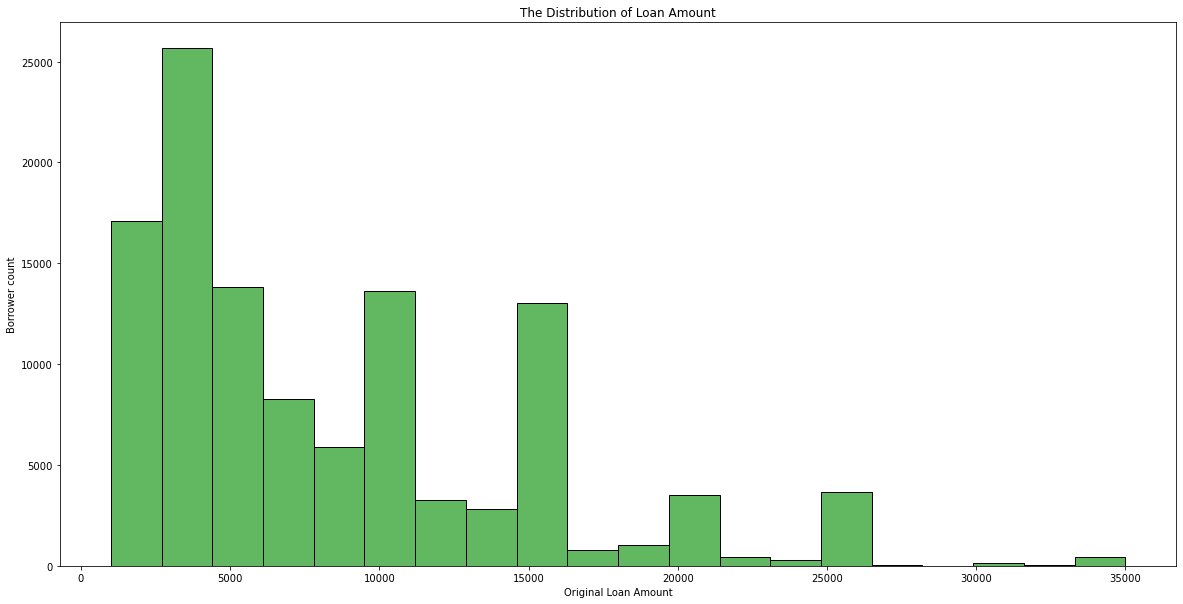

In [3]:
#Defining the theme color to be used for visualisations
colour = sb.color_palette()[2]

#setting figure size
plt.figure(figsize = [20, 10])

#a histigram of Original Loan amount
sb.histplot( loan['LoanOriginalAmount'], bins= 20, kde= False, color= colour)

#Setting plot labels & title
plt.xlabel('Original Loan Amount')
plt.ylabel('Borrower count')
plt.title('The Distribution of Loan Amount');

## The relationship between loan amounts,annual interest rate and  borrower income range 

#### Borrower APR vs Original Loan Amount
The annual interest rates are represented by the Borrower APR which ranges from 0.01 - 0.5. The data shows that borrower APR tends to decrease as the loan amount increases.

#### Original Loan amount vs Borrower income ranges
Higher earning borrowers tend to access loans of higher amounts as opposed to the low earning counterparts. This, therefore, also gives them acces to lower annual interest rates.

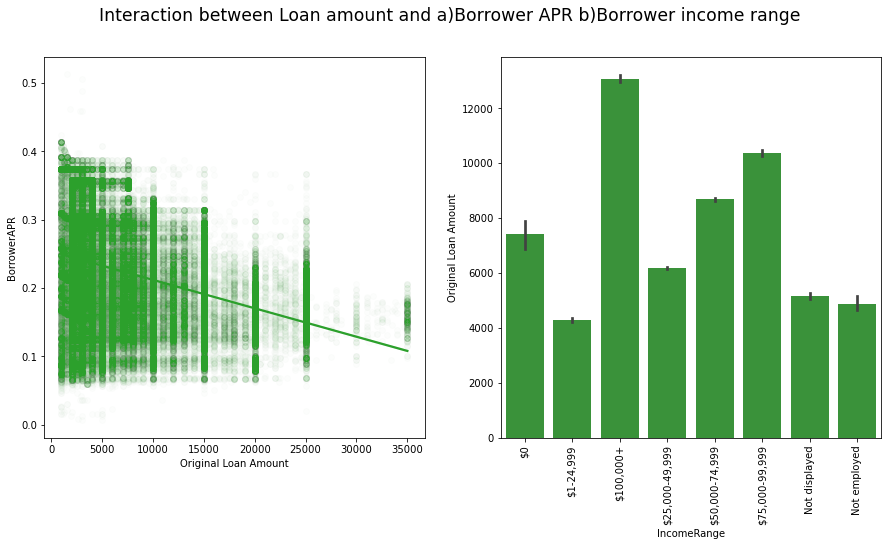

In [24]:
#Defining the theme color to be used for visualisations
colour = sb.color_palette()[2]
#setting figure size
plt.figure(figsize = [15, 7])

# left plot: Scatter plot
# Showing the relationship between Borrower APR and Original Loan Amount
ax1 = plt.subplot(1, 2, 1)
sb.regplot(data = loan, x ='LoanOriginalAmount', y= 'BorrowerAPR', x_jitter=0.2, scatter_kws ={'alpha': 0.01}, color=colour)
plt.xlabel('Original Loan Amount') #labeling the x-axis


# Right plot: Barplot
# Showing the relationship between Income Range and Original Loan Amount
ax4 = plt.subplot(1,2,2)
sb.barplot(data = loan , x = 'IncomeRange', y = 'LoanOriginalAmount', color = colour)
plt.ylabel('Original Loan Amount') #labeling the y-axis
plt.xticks(rotation =90); #rotating the x-axis ticks to prevent overlap


plt.suptitle('Interaction between Loan amount and a)Borrower APR b)Borrower income range', size = 'xx-large', weight ='book');

## Number of Loans per year

In 2009 there is a significant drop in the number of loans. From 2010, we see a steady climb in the number of loans per year up to a significant (nearly 100%) increase between 2012 and 2013. This marks the end of the rise as it is followed by a sharp decline in 2014.

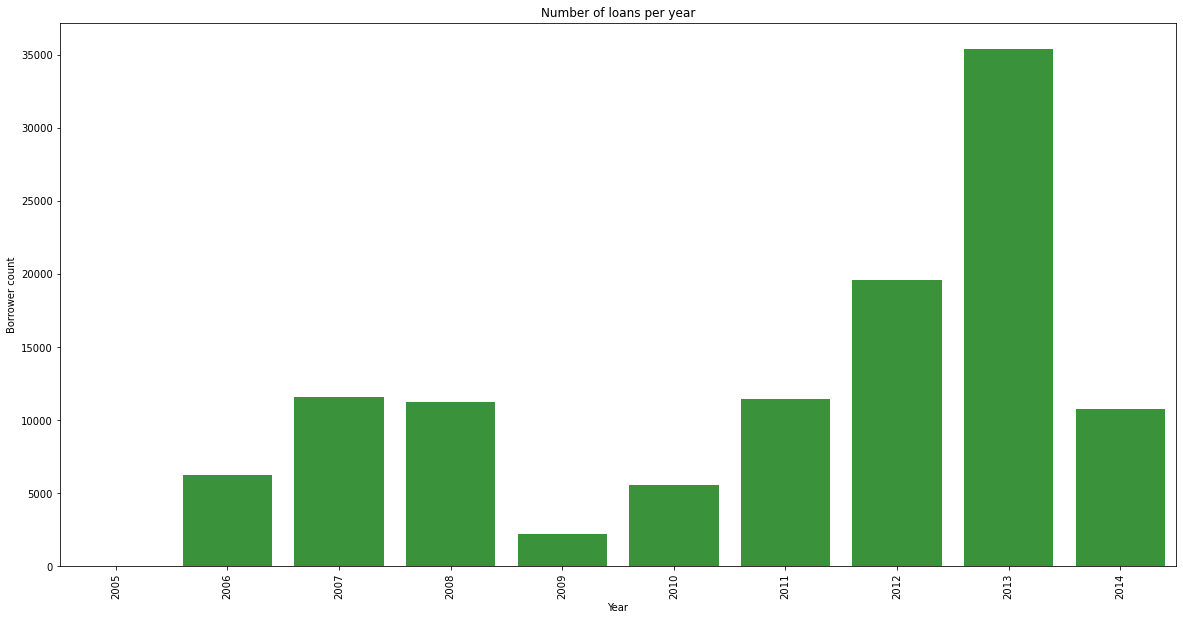

In [5]:
#setting figure size
plt.figure(figsize = [20, 10])

#A countplot showing number of loans given per year
sb.countplot(data = loan, x='Year',color = colour)

#Rotating x-axis ticks to prevent overlap
plt.xticks (rotation =90)

#Setting y- axis label and plot title
plt.ylabel('Borrower count')
plt.title('Number of loans per year');

## What state has the highest borrower count?

This dataset covers all 50 states and Washington DC. This allows us see what states contribute more towards the annual borrower count. From the graph it shows that California has the hightest borrower count. Followed in the distance by Texas, New York and Florida.

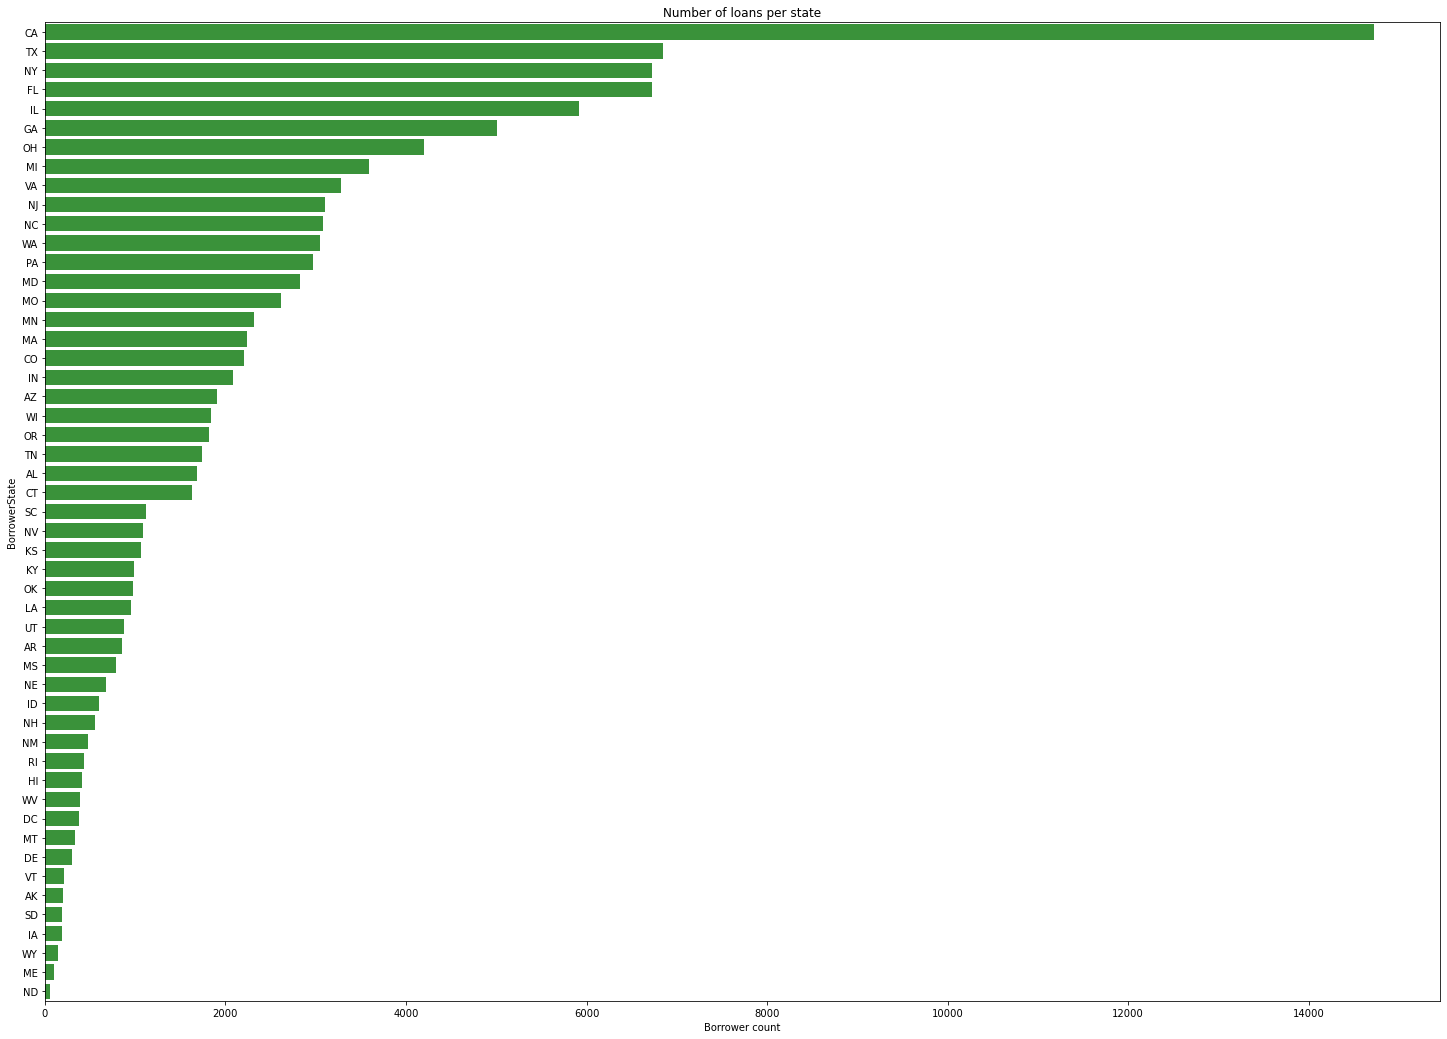

In [26]:
#Determining appropriate figure size
plt.figure(figsize=(25,18))

#Define order of bar arrangement to go in descending order
type_order = loan['BorrowerState'].value_counts().index

#countplot showing number of loans given in each state
sb.countplot(data = loan, y = 'BorrowerState', color = colour, order =type_order)

#Setting x-axis label & plot title
plt.xlabel('Borrower count')
plt.title('Number of loans per state');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert <Part_II_Prosper_Loan_Data>.ipynb --to slides --post serve


The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 